## Apa saja yang dibahas dalam project ini?

Project ini berupa tes untuk melihat kemampuan kamu dalam mulai berkarir menjadi Data Engineer. Tes ini terdiri atas 2 (dua) bagian, yaitu: 

1. **Web Scraping**, yang dirancang untuk memperlihatkan kemampuan member dalam mengambil data dari website dalam bentuk data HTML
2. **Function and Regular Expression**, yang dirancang untuk memperlihatkan pengetahuan member terkait dasar-dasar pembuatan sebuah function dan penggunaan Regular Expression dalam bahasa pemrograman Python.

## Web Scraping

Sebagai seorang Data Engineer, Anda diminta untuk menggali informasi dari https://id.wikipedia.org/wiki/Demografi_Indonesia menggunakan bahasa pemrograman Python. 

Buatlah suatu script Python untuk menyimpan tabel "Jumlah Penduduk menurut Provinsi" dari web tersebut dengan format CSV.

File CSV **menggunakan format double-apostrophe quoting ('...')** dan **disimpan dengan nama 'Indonesia_Demography_by_Province.csv'**.

Kolom yang perlu Anda ambil adalah sebagai berikut:
1. Nama provinsi 
2. Luas (km2)
3. Populasi (2010)
4. Populasi (2020)

Dataframe yang akan kamu buat diassign 
dengan nama variabel df.

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import requests
from bs4 import BeautifulSoup

#buatlah request ke website
website_url = requests.get('https://id.wikipedia.org/wiki/Demografi_Indonesia').text
soup = BeautifulSoup(website_url, 'lxml')

#ambil table dengan class 'wikitable sortable'
my_table = soup.find('table', {'class':'wikitable sortable'})

#cari data dengan tag 'td'
links = my_table.findAll('td')

#buatlah lists kosong 
nama = []
luas_km = []
populasi10 = []
populasi20 = []

#memasukkan data ke dalam list berdasarkan pola HTML
for i, link in enumerate(links):
	if i in range(0, len(links), 4):
		nama.append(link.get_text()[:-1])
	if i in range(1, len(links), 4):
		luas_km.append(link.get_text()[:-1])
	if i in range(2, len(links), 4):
		populasi10.append(link.get_text()[:-1])
	if i in range(3, len(links), 4):
		populasi20.append(link.get_text()[:-1])

#buatlah DataFrame dan masukkan ke CSV
df = pd.DataFrame()
df['Nama Provinsi'] = nama
df['Luas km'] = luas_km
df['Populasi 2010'] = populasi10
df['Populasi 2020'] = populasi20
df.to_csv('Indonesia_Demography_by_Province.csv', index=False, encoding='utf-8', quoting=1)
print(df)

                    Nama Provinsi     Luas km Populasi 2010 Populasi 2020
0                            Aceh   56.500,51     4.494.410     5.274.871
1                   Sumatra Utara   72.427,81    12.982.204    14.799.361
2                   Sumatra Barat   42.224,65     4.846.909     5.534.472
3                            Riau   87.844,23     5.538.367     6.394.087
4                           Jambi   45.348,49     3.092.265     3.548.228
5                 Sumatra Selatan   91.592,43     7.450.394     8.467.432
6                        Bengkulu   19.795,15     1.715.518     2.010.670
7                         Lampung   37.735,15     7.608.405     9.007.848
8       Kepulauan Bangka Belitung   16.424,14     1.223.296     1.455.678
9                  Kepulauan Riau    8.084,01     1.679.163     2.064.564
10  Daerah Khusus Ibukota Jakarta      740,29     9.607.787    10.562.088
11                     Jawa Barat   36.925,05    43.053.732    48.274.162
12                    Jawa Tengah   32

## Function and Regular Expression

Sebagai seorang Data Engineer, Anda diminta untuk membuat suatu fungsi yang bernama **“email_check”** untuk menyaring beberapa email menggunakan regular expression dalam bahasa pemrograman Python. Fungsi ini akan menerima suatu parameter yang bernama “input” yang mana merupakan email dan output-nya akan berupa **“Pass” ** atau **“Not Pass”**. Fungsinya harus memenuhi pola berikut :

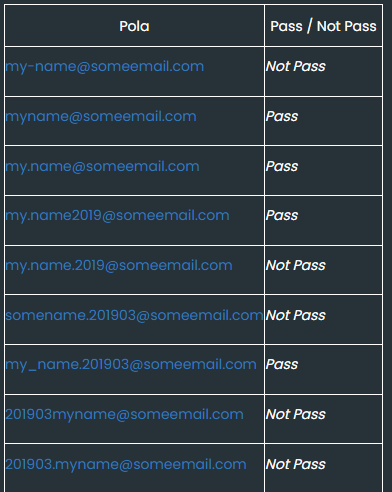

In [ ]:
#import library yang dibutuhkan
import re

#function email_check
def email_check(input):
    match = re.search('(?=^((?!-).)*$)(?=[^0-9])((?=^((?!\.\d).)*$)|(?=.*_))',input)
    if match:
  	    print('Pass')
    else:
  	    print('Not Pass')

#Masukkan daftar email ke dalam list
emails = ['my-name@someemail.com', 'myname@someemail.com','my.name@someemail.com',
'my.name2019@someemail.com', 'my.name.2019@someemail.com',
'somename.201903@someemail.com','my_name.201903@someemail.com',
'201903myname@someemail.com', '201903.myname@someemail.com']

#Looping untuk pengecekan Pass atau Not Pass
for email in emails :
	email_check(email)

Not Pass
Pass
Pass
Pass
Not Pass
Not Pass
Pass
Not Pass
Not Pass


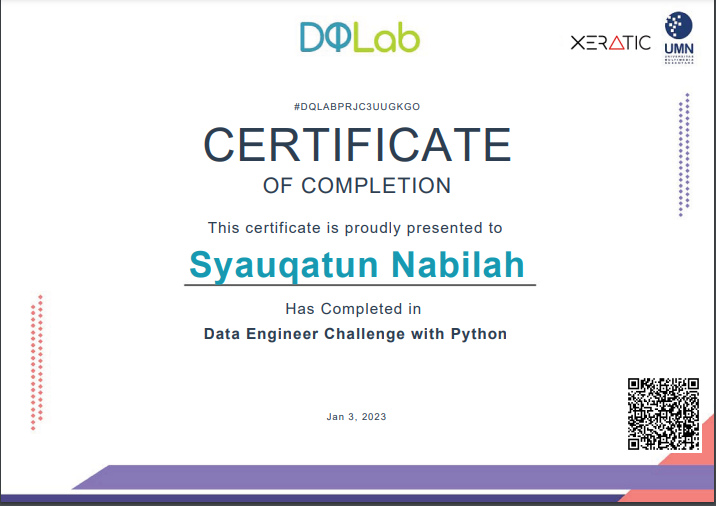